# Beispiel 1: Berechnung des Molaren Extinktionskoeffizienten
Dieses Beispiel zeigt wie man den Molaren Extinktionskoeffizienten bestimmt, das muss man sowieso für jedes zweite Protokoll machen.
Dazu Tragen wir den Logarithmus der Intensität gegen die Konzentration auf. Die Steigung der Ausgleichsgeraden geteilt durch die Länge der Küvette ist dann der Molare Extinktionskoeffizient

In [4]:
# Zuerst importieren wir ein paar Bibliotheken
# Allgemein: import <biblothek> as <abkürzung>
# Importiert alle funktionen der bibliothek, später aufrufbar mit <abkürzung.funktion>
# oder from <bibliothek> import <funktion> 
# Importiert nur eine einzelne funktion.
# Dann kann man sie einfach mit <funktion> aufrufen. Kein Präfix mehr nötig

import matplotlib.pyplot as plt # zum erstellen der Grafik
from uncertainties import ufloat
from uncertainties.umath import *
from jupyterpc import *
%matplotlib notebook

In [5]:
# Jetzt kommen die Messwerte dazu
# Datenreihen bekommen hier immer den prefix data_
sigma_v = 1e-4
sigma_I = 1e-3
data_v_wasser = [ ufloat(x, sigma_v) for x in [990.0, 980.0, 950.0, 900.0, 800.0, 500.0]] # werte für das zugegebene Volumen an wasser
data_v_farb = [ ufloat(x, sigma_v) for x in [10.0, 20.0, 50.0, 100.0, 200.0, 500.0]] # Werte für die zugegebene Menge an Farbstoff-Lösung (0.01-Molar)
data_I = [ ufloat(x, sigma_I) for x in [7.145, 6.955, 7.012, 6.708, 6.708, 5.616]] # Werte für die Extinktion
c0_farbe = 1e-2

Zuerst muss die Konzentration des Farbstoffes in der Küvette für jede gewählte Konzentration Berechnet werden.
$$
c_{Küvette} = c_0\cdot\frac{v_{Farbstoff}}{v_{Farbstoff}+v_{Wasser}}
$$

Die Extinktion berechnet sich aus der Intensität
$$
E = log\left(\frac{I_0}{I}\right)
$$

Trägt man die Extinktion gegen die Farbstoffkonzentration auf, so enspricht die Steigung der 
Ausgleichsgeraden dem Molaren Extinkntionskoeffizienten.

$$
E = \epsilon c d\\
\leftrightarrow \frac{\delta E}{\delta c}\frac{1}{d} = \epsilon = \frac{m}{d}
$$

<IPython.core.display.Javascript object>


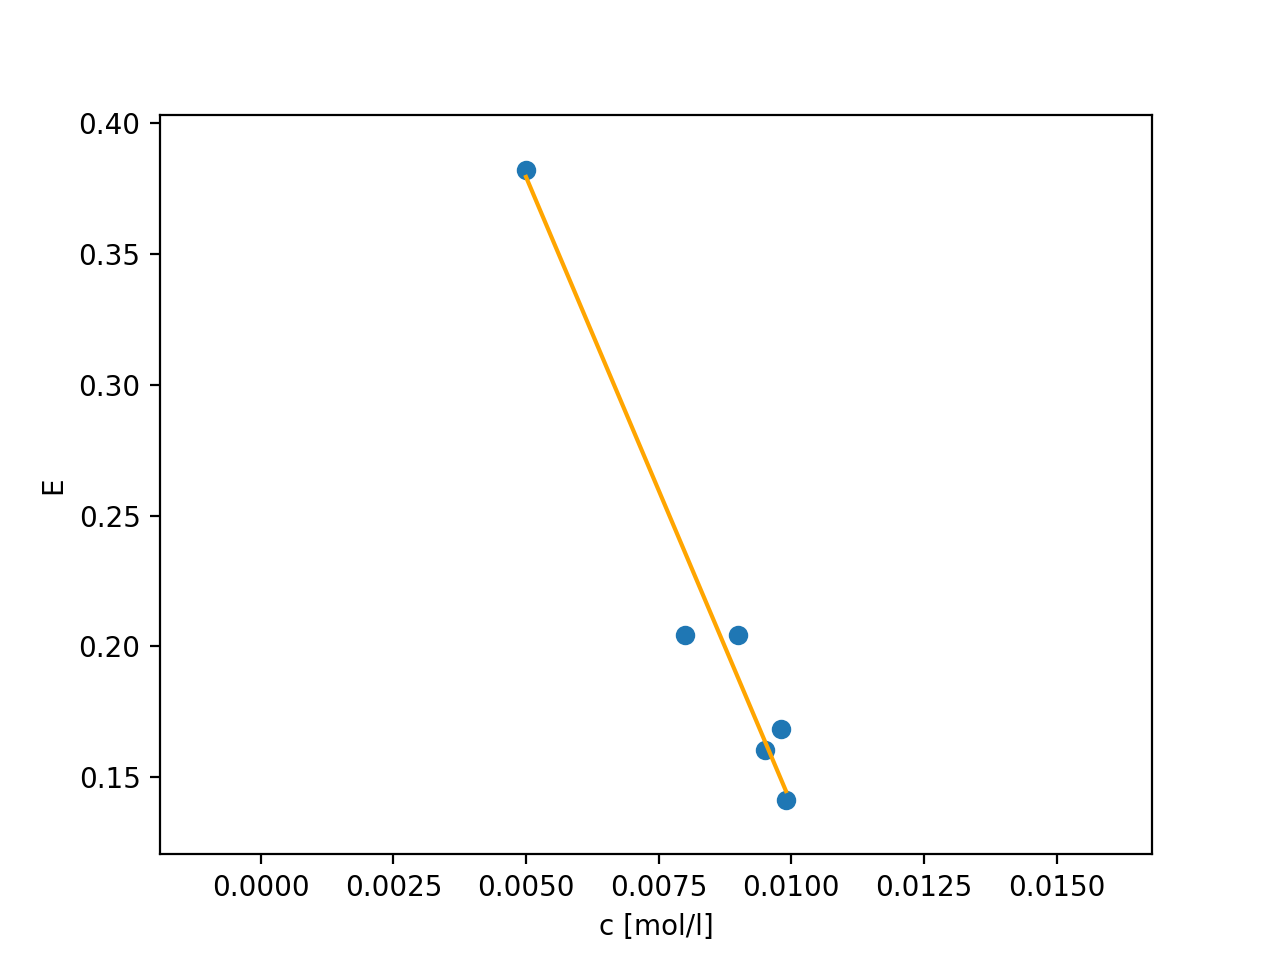

der Extinktionskoeffizient ist (-24.0 \pm 2.8) \si{\liter\per\mol\per\centimerter}


In [15]:
# Zuerst rechnen wir die konzentration der jeweiligen lösungen aus. 
data_c = [c0_farbe*v_wasser/(v_wasser+v_farbe) for v_wasser, v_farbe in zip(data_v_wasser, data_v_farb)]

# Jetzt rechnen wir log(I/I0)=E aus
I_0 = 8.23 #Intensität ohne farbstoff
data_E = [log(I_0/I) for I in data_I]

#Jetzt können wir die ausgleichsgerade bestimmen
m, b = fit(data_c, data_E, beta=[12., 23])
# Und die grafik generieren
plt.figure()
plt.xlabel('c [mol/l]')
plt.ylabel('E')
plt.scatter(num(data_c), num(data_E)) # Werte
plt.plot(num(data_c), [m.n*x+b.n for x in num(data_c)], color='orange') # Ausgleichsgerade
plt.show()

epsilon = m/2 # Küvette war 2cm dick
print('der Extinktionskoeffizient ist ('+sci(epsilon)+') \si{\liter\per\mol\per\centimerter}')